In [1]:
import pandas as pd
import numpy as np

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
embryo_sub = pd.read_csv('tables_spearman/embryo_subprocess.csv')
embryo_gene = pd.read_csv('tables_spearman/embryo_gene.csv')
embryo_sum = pd.read_csv('tables_spearman/embryo_summary.csv')

In [49]:
aging_mouse_sub = pd.read_csv('tables_spearman/Ageing_skin_mouse_spearman_subprocess.csv', index_col=0)
aging_mouse_sub.columns = embryo_sub.columns
aging_mouse_gene = pd.read_csv('tables_spearman/Ageing_skin_mouse_by_gene_spearman.csv', index_col=0)
aging_mouse_gene.columns = embryo_gene.columns
aging_mouse_sum = pd.read_csv('tables_spearman/Ageing_skin_mouse_gene_count_spearman.csv', index_col=0)
aging_mouse_sum.columns = embryo_sum.columns

In [50]:
aging_human_sub = pd.read_csv('tables_spearman/aging_per_subprocess_human.csv')
aging_human_gene = pd.read_csv('tables_spearman/aging_per_gene_human.csv')
aging_human_sum = pd.read_csv('tables_spearman/aging_summary_human.csv')

aging_human_sub.columns = embryo_sub.columns
aging_human_gene.columns = embryo_gene.columns
aging_human_sum.columns = embryo_sum.columns

In [83]:
aging_human_sub

,Hallmark,Subprocess,Spearman,p-value,Experiment,Species
0,Autophagy,Autophagy core,0.025195,0.000781,Agging ovary,Human
1,Proteostasis,Translation,0.015356,0.040692,Agging ovary,Human
2,Proteostasis,Ubiquitin Proteasome System,0.010207,0.174519,Agging ovary,Human
3,Proteostasis,Ubiquitin Proteasome System,-0.032262,0.038336,Agging fibroblast,Human


In [193]:
# repr_sub = pd.read_csv('tables_spearman/reprogramming_subprocess.csv')
# repr_gene = pd.read_csv('tables_spearman/reprogramming_per_gene.csv')
# repr_gene['Gene Symbol'] = repr_gene['GeneSymbol']
# repr_gene.drop(columns=['GeneSymbol'], inplace=True)
# repr_sum = pd.read_csv('tables_spearman/reprogramming_summary_for_genes.csv')

repr_sub = pd.read_csv('tables_spearman/subprocess_reprogramming.csv')
repr_gene = pd.read_csv('tables_spearman/per_gene_reprogramming.csv')
repr_sum = pd.read_csv('tables_spearman/summary_for_genes_reprogramming.csv')

repr_sub.columns = embryo_sub.columns
repr_gene.columns = embryo_gene.columns
repr_sum.columns = embryo_sum.columns

In [176]:
repr_gene[repr_gene['Experiment'] == 'Reprogramming-4']

,Hallmark,Subprocess,Gene Symbol,Spearman,p-value,Experiment,Species
0,Autophagy,Autophagy core,NaN,-0.575375,5.431518e-05,Reprogramming-4,Mouse
1,Autophagy,Autophagy core,NaN,0.267401,8.300290e-02,Reprogramming-4,Mouse
2,Autophagy,Autophagy core,NaN,-0.425178,4.480832e-03,Reprogramming-4,Mouse
3,Autophagy,Autophagy core,NaN,0.769822,1.602055e-09,Reprogramming-4,Mouse
4,Autophagy,Autophagy core,NaN,0.939235,1.202601e-20,Reprogramming-4,Mouse
...,...,...,...,...,...,...,...
4351,Senescence,SASP_Transmembrane,NaN,-0.491812,8.096367e-04,Reprogramming-4,Mouse
4352,Senescence,SASP_Transmembrane,NaN,-0.841928,1.507256e-12,Reprogramming-4,Mouse
4353,Senescence,Upregulation of anti-apoptotic pathways,NaN,0.225144,1.466201e-01,Reprogramming-4,Mouse
4354,Senescence,Upregulation of anti-apoptotic pathways,NaN,-0.575375,5.431518e-05,Reprogramming-4,Mouse


In [194]:
subprocess_all = pd.concat([embryo_sub, aging_mouse_sub, aging_human_sub, repr_sub], ignore_index=True)
subprocess_all['Hallmark'] = subprocess_all['Hallmark'].replace("Genomic instability", "Genomic Instability")
subprocess_all['Experiment'] = subprocess_all['Experiment'].replace("Agging ovary", "Ageing ovary")
subprocess_all['Experiment'] = subprocess_all['Experiment'].replace("Agging fibroblast", "Ageing fibroblast")

subprocess_all = subprocess_all.dropna(subset=['Spearman'])

subprocess_all

,Hallmark,Subprocess,Spearman,p-value,Experiment,Species
0,Senescence,DNA damage response,0.086816,7.065056e-44,Embryo,Human
1,Senescence,SASP,0.075348,0.000000e+00,Embryo,Human
2,Senescence,SASP_Secreted,0.003562,1.210633e-01,Embryo,Human
3,Senescence,Metabolic adaptations,0.090075,2.222326e-26,Embryo,Human
4,Senescence,Cell cycle arrest,0.089405,8.928841e-83,Embryo,Human
...,...,...,...,...,...,...
463,Senescence,SASP,-0.388898,1.450141e-03,Reprogramming-4,Mouse
464,Senescence,SASP_Intracellular,0.211801,2.410809e-05,Reprogramming-4,Mouse
465,Senescence,SASP_Secreted,-0.442514,1.526772e-03,Reprogramming-4,Mouse
466,Senescence,SASP_Transmembrane,-0.513031,5.514170e-05,Reprogramming-4,Mouse


In [195]:
subprocess_all[subprocess_all['Experiment'] == 'Ageing fibroblast']

,Hallmark,Subprocess,Spearman,p-value,Experiment,Species
177,Proteostasis,Ubiquitin Proteasome System,-0.032262,0.038336,Ageing fibroblast,Human


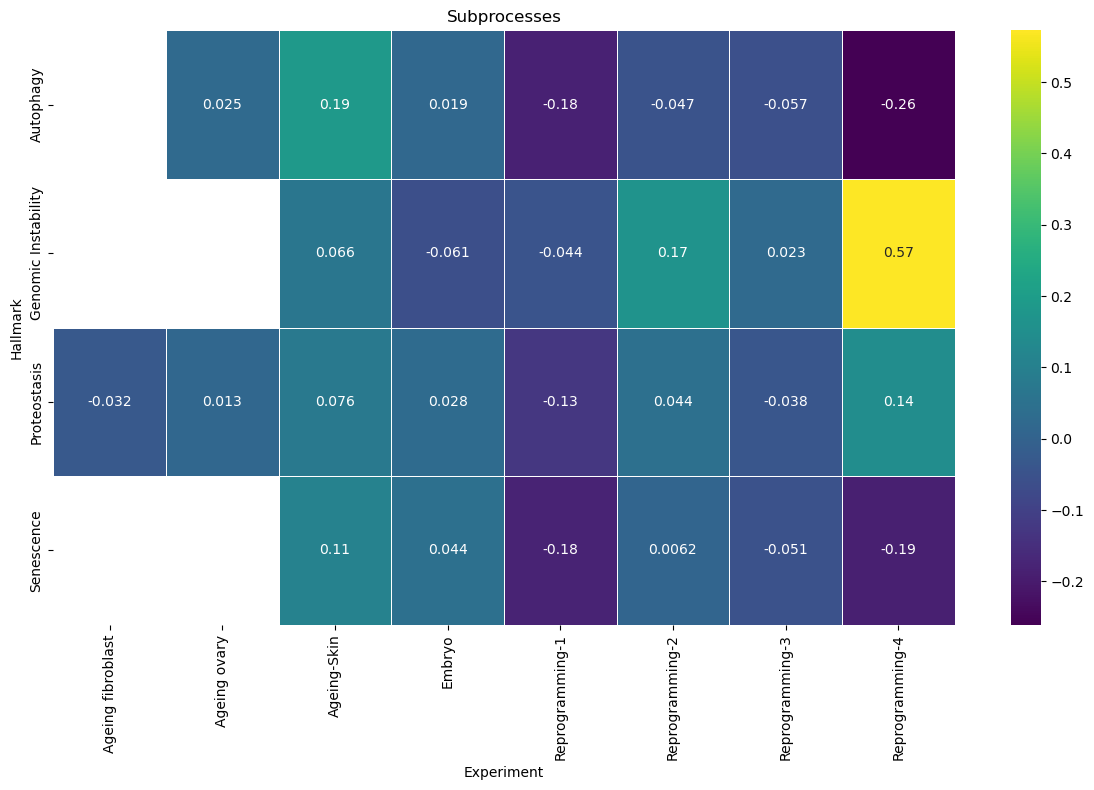

In [196]:
pivot_table = subprocess_all.pivot_table(index='Hallmark', columns='Experiment', values='Spearman')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Subprocesses')
plt.xlabel('Experiment')
plt.ylabel('Hallmark')
plt.tight_layout()
plt.show()

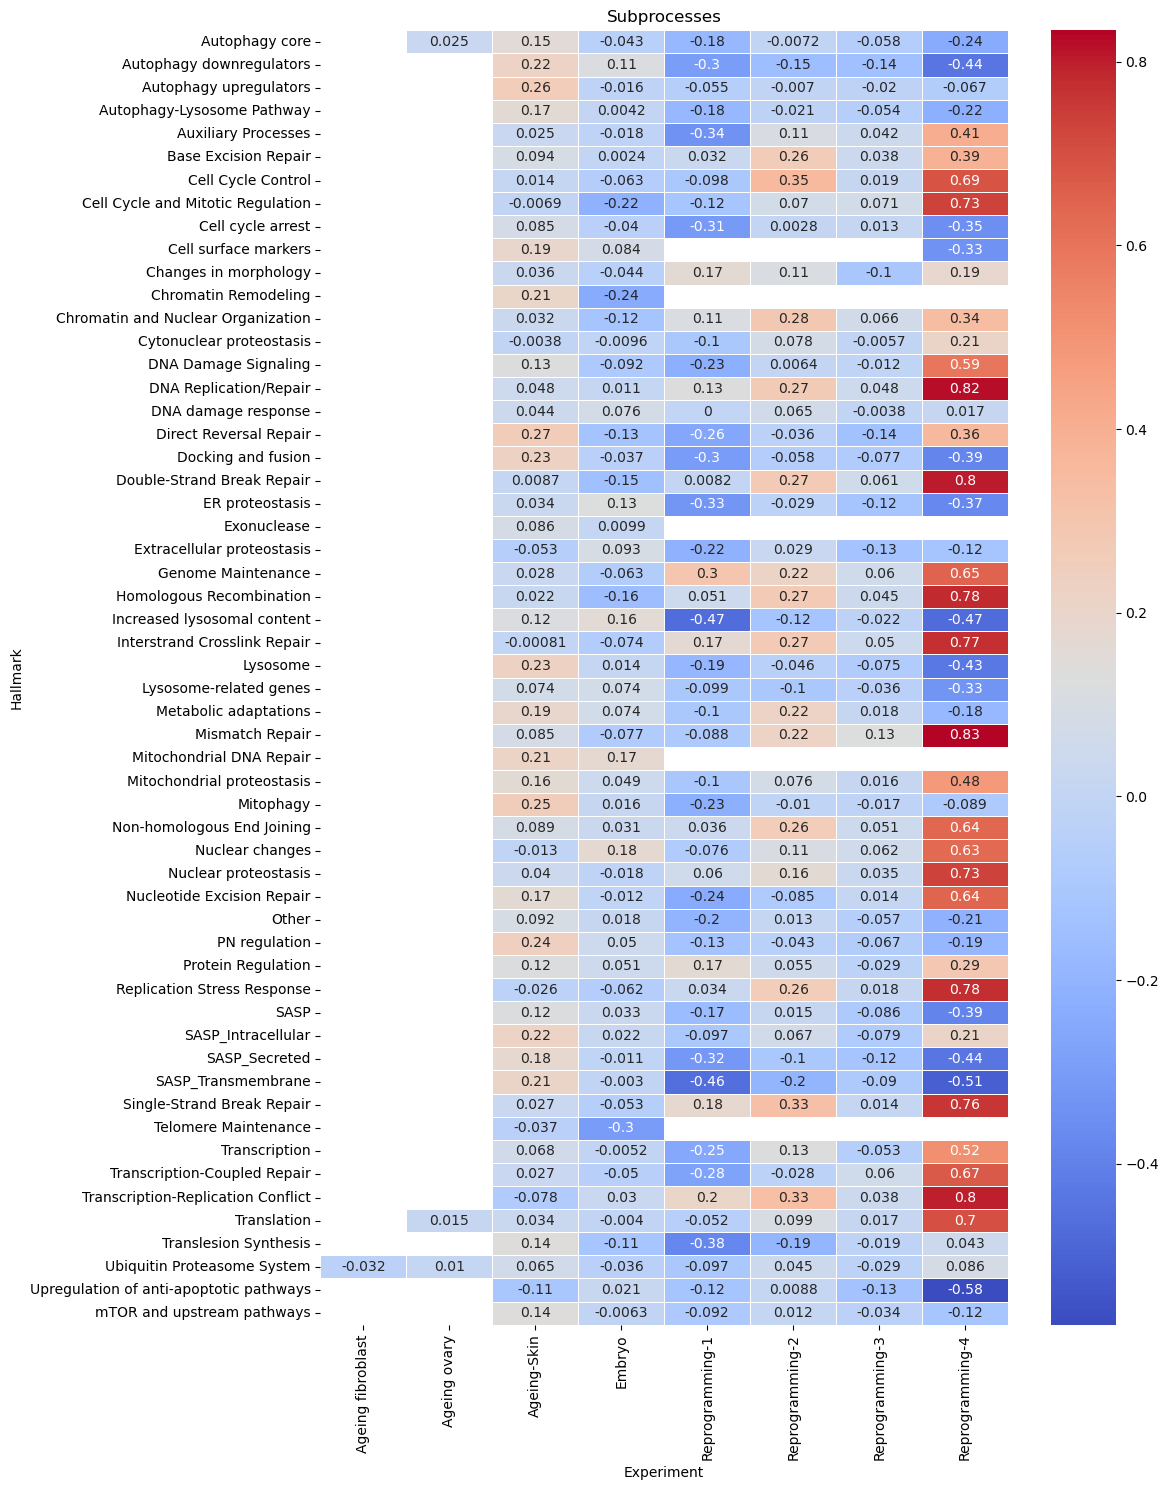

In [99]:
pivot_table = subprocess_all.pivot_table(index='Subprocess', columns='Experiment', values='Spearman')

# Plotting the heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Subprocesses')
plt.xlabel('Experiment')
plt.ylabel('Hallmark')
plt.tight_layout()
plt.show()

In [197]:
genes_all = pd.concat([embryo_gene, aging_mouse_gene, aging_human_gene, repr_gene], ignore_index=True)
genes_all['Hallmark'] = genes_all['Hallmark'].replace("Genomic instability", "Genomic Instability")
genes_all['Hallmark'] = genes_all['Hallmark'].replace("Genomic", "Genomic Instability")
genes_all['Experiment'] = genes_all['Experiment'].replace("Agging ovary", "Ageing ovary")
genes_all['Experiment'] = genes_all['Experiment'].replace("Agging fibroblast", "Ageing fibroblast")

genes_all = genes_all[abs(genes_all['Spearman']) > 0.2]

genes_all

,Hallmark,Subprocess,Gene Symbol,Spearman,p-value,Experiment,Species
0,Senescence,DNA damage response,BAX,0.285208,1.045573e-44,Embryo,Human
2,Senescence,DNA damage response,ERCC1,-0.346577,1.974057e-66,Embryo,Human
5,Senescence,DNA damage response,HMGA1,0.517097,4.901085e-159,Embryo,Human
6,Senescence,DNA damage response,KRAS,-0.227753,1.029867e-28,Embryo,Human
7,Senescence,DNA damage response,MACROH2A1,0.223337,1.199065e-27,Embryo,Human
...,...,...,...,...,...,...,...
28392,Senescence,SASP_Transmembrane,Cd9,0.305251,2.329369e-19,Reprogramming-3,Mouse
28396,Senescence,SASP_Transmembrane,Egfr,-0.421841,3.829023e-37,Reprogramming-3,Mouse
28397,Senescence,SASP_Transmembrane,Il6st,-0.255358,8.026002e-14,Reprogramming-3,Mouse
28401,Senescence,SASP_Transmembrane,Tnfrsf11b,-0.528634,6.170869e-61,Reprogramming-3,Mouse


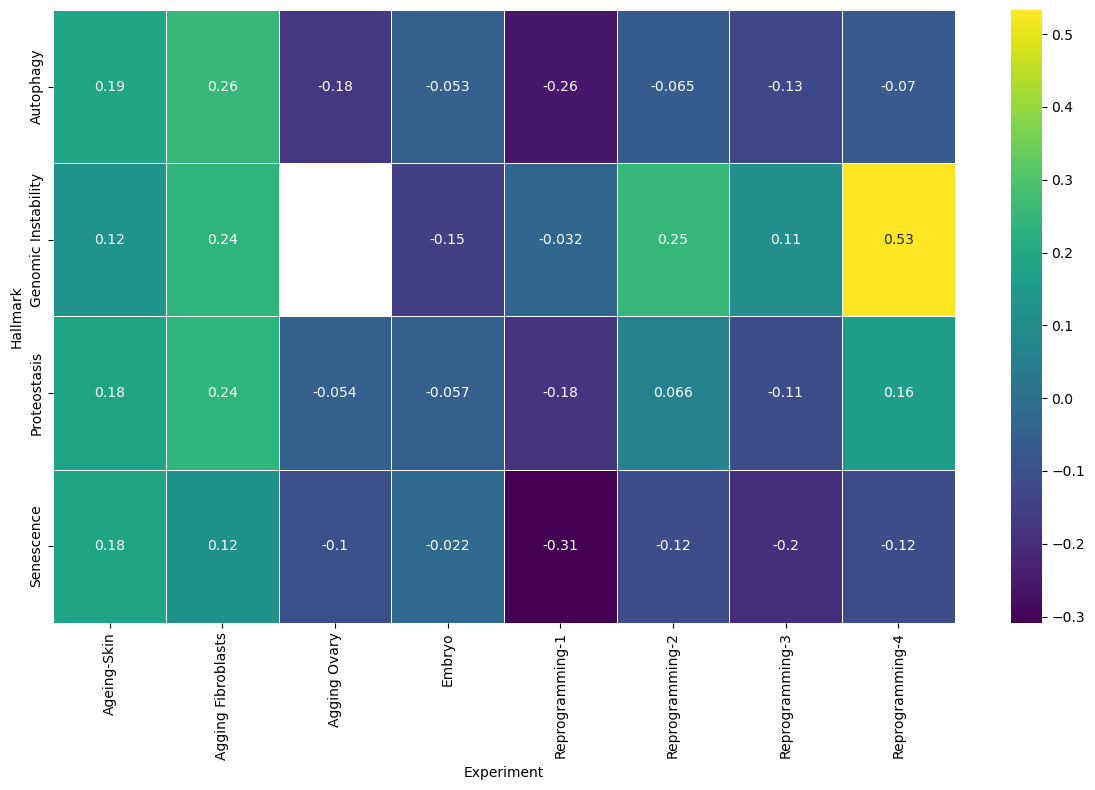

In [226]:
pivot_table = genes_all.pivot_table(index='Hallmark', columns='Experiment', values='Spearman')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', linewidths=0.5)
# plt.title('Genes')
plt.xlabel('Experiment')
plt.ylabel('Hallmark')
plt.tight_layout()
# plt.show()
plt.savefig("heatmap_hallmarks.png", dpi = 500)

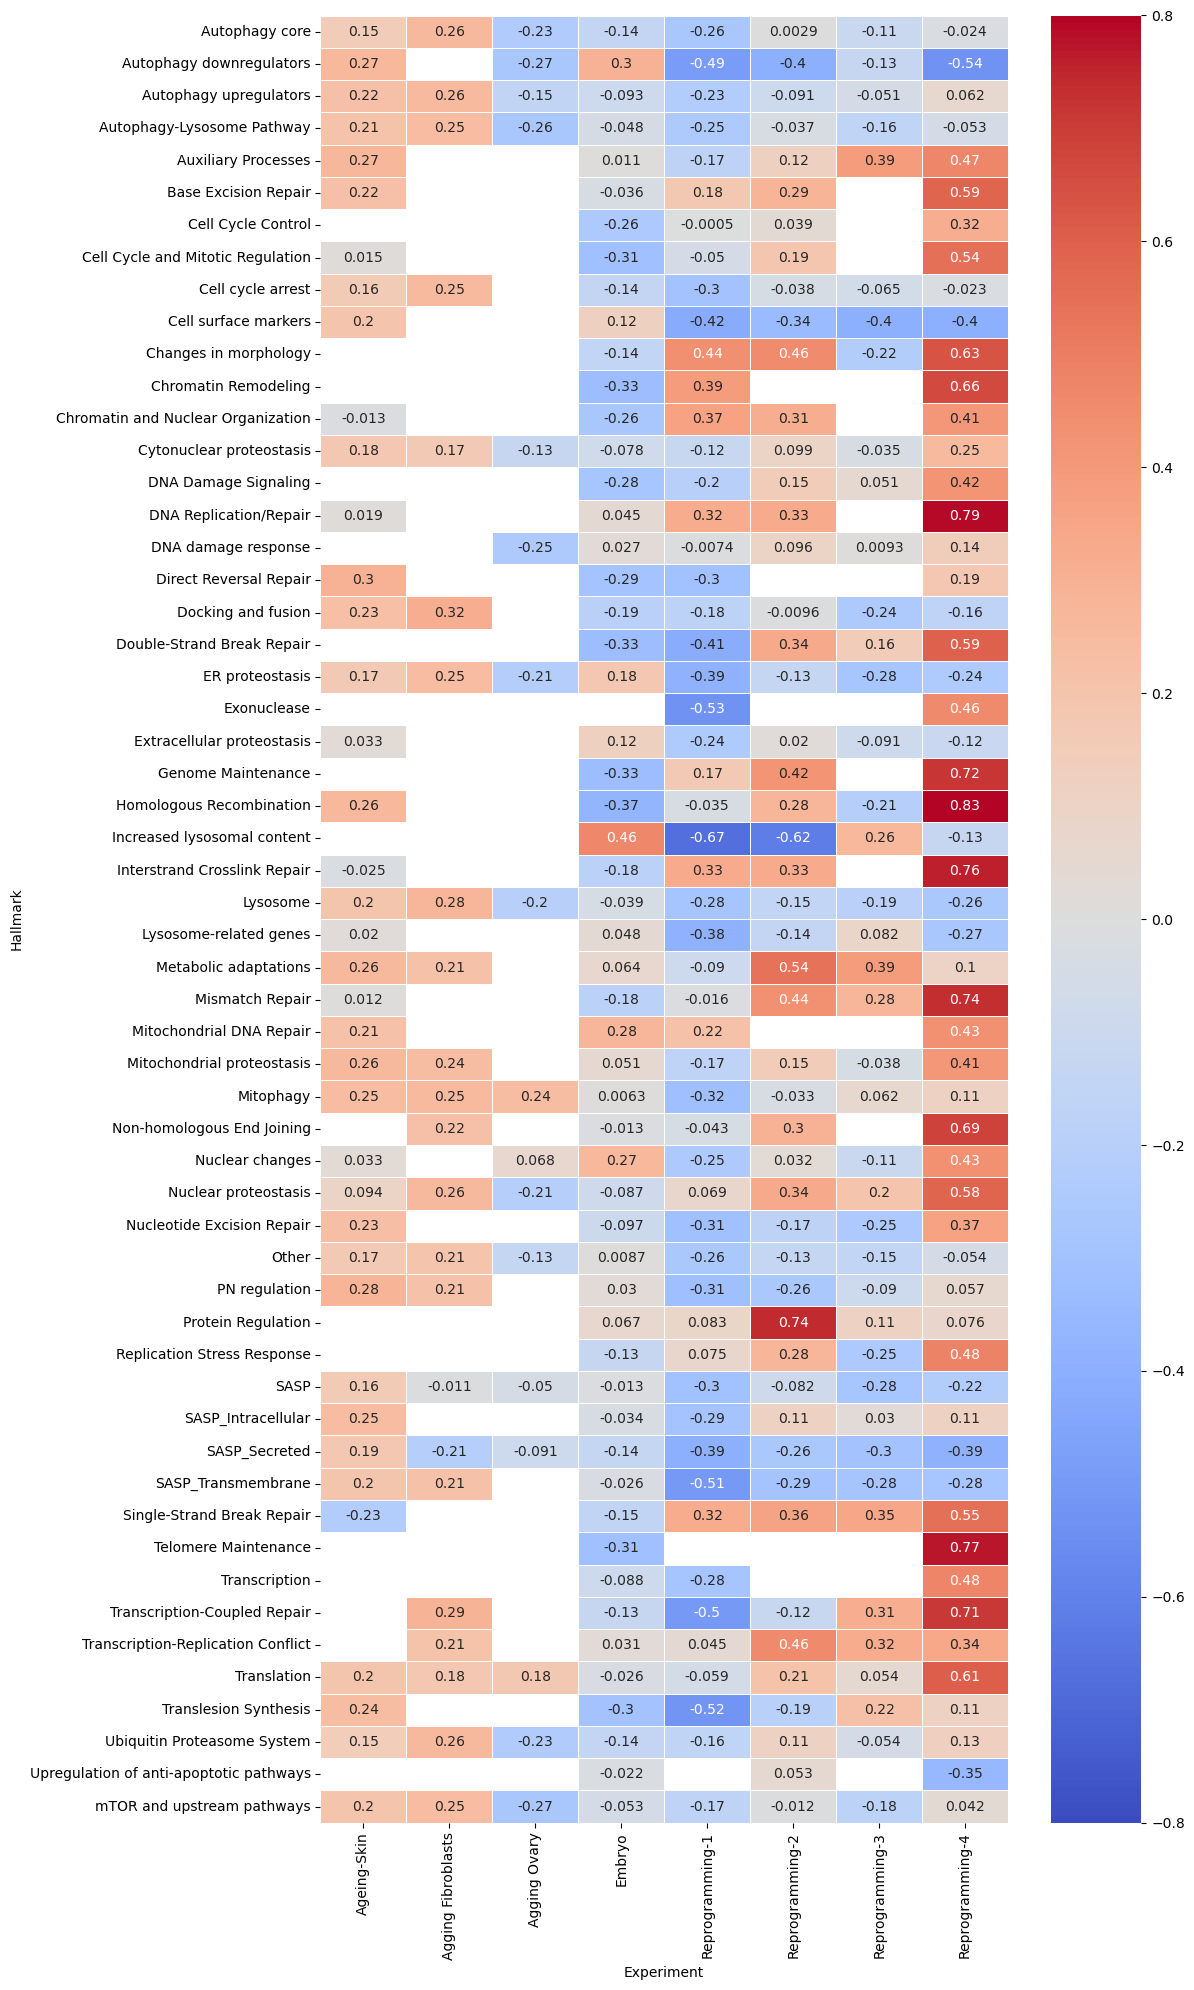

In [227]:
pivot_table = genes_all.pivot_table(index='Subprocess', columns='Experiment', values='Spearman')

# Plotting the heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.8, vmax=0.8)
# plt.title('Genes')
plt.xlabel('Experiment')
plt.ylabel('Hallmark')
plt.tight_layout()
# plt.show()

plt.savefig("heatmap_subprocesses.png", dpi = 500)

In [200]:
summary_all = pd.concat([embryo_sum, aging_mouse_sum, aging_human_sum, repr_sum], ignore_index=True)
summary_all

,Hallmark,Subprocess,n_genes>0.2,n_genes<-0.2,n_genes>0.4,n_genes<-0.4,Experiment,Species
0,Senescence,DNA damage response,3,2,1,0,Embryo,Human
1,Senescence,SASP,26,11,11,1,Embryo,Human
2,Senescence,SASP_Secreted,8,11,2,1,Embryo,Human
3,Senescence,Metabolic adaptations,1,1,1,0,Embryo,Human
4,Senescence,Cell cycle arrest,5,1,1,1,Embryo,Human
...,...,...,...,...,...,...,...,...
426,Senescence,Upregulation of anti-apoptotic pathways,1,2,0,2,Reprogramming-4,Mouse
427,Autophagy,mTOR and upstream pathways,20,45,7,23,Reprogramming-1,Human
428,Autophagy,mTOR and upstream pathways,22,26,4,0,Reprogramming-2,Human
429,Autophagy,mTOR and upstream pathways,3,14,0,3,Reprogramming-3,Mouse


In [105]:
pivot_table

Experiment,Ageing-Skin,Agging Fibroblasts,Agging Ovary,Embryo,Reprogramming-1,Reprogramming-2,Reprogramming-4
Gene Symbol,,,,,,,
4930523C07Rik,NaN,NaN,NaN,NaN,NaN,NaN,-0.475621
A2M,NaN,NaN,NaN,NaN,-0.256888,NaN,NaN
A2m,NaN,NaN,NaN,NaN,NaN,NaN,0.231503
AAAS,NaN,NaN,NaN,NaN,0.248383,0.213851,NaN
AARS1,NaN,NaN,NaN,0.561213,0.582613,0.410125,NaN
...,...,...,...,...,...,...,...
Zranb3,NaN,NaN,NaN,NaN,NaN,NaN,0.863370
Zswim2,NaN,NaN,NaN,-0.274786,NaN,NaN,NaN
Zswim8,NaN,NaN,NaN,NaN,NaN,NaN,-0.541157


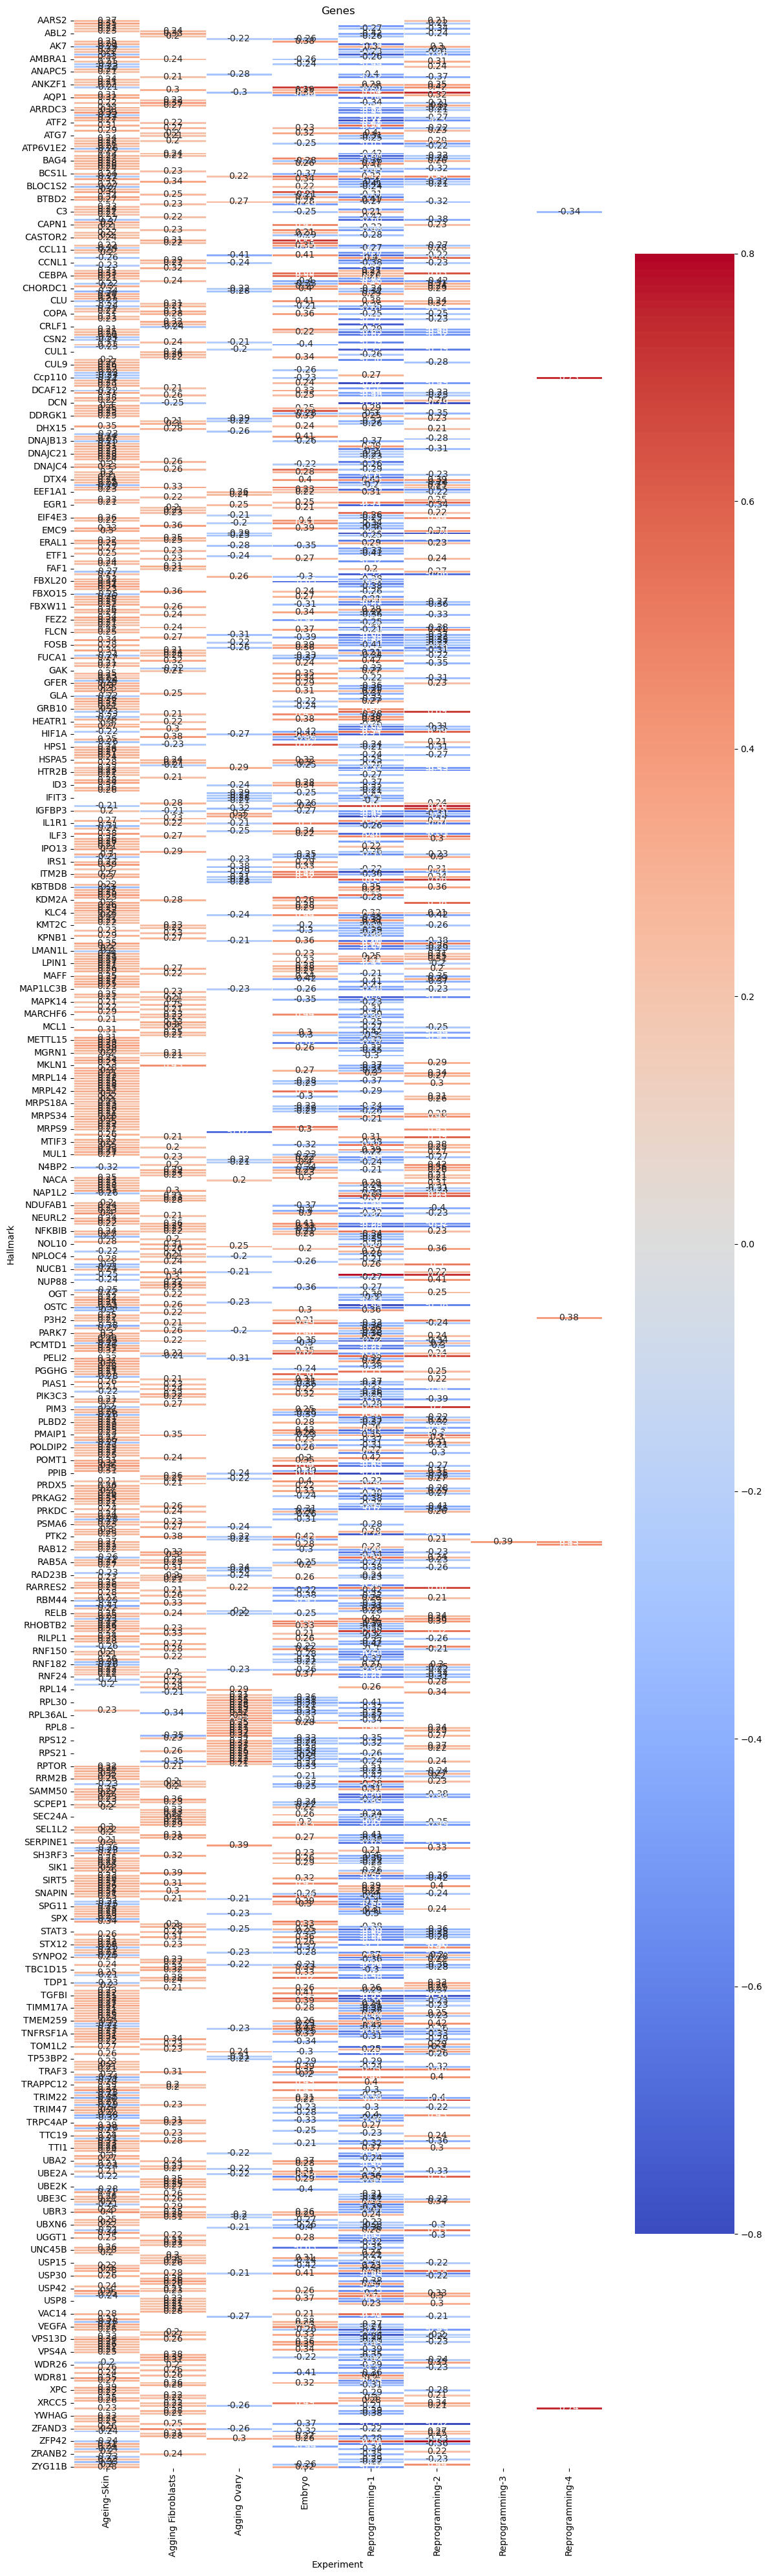

In [201]:
pivot_table = genes_all.pivot_table(index='Gene Symbol', columns='Experiment', values='Spearman')

pivot_table_dropna = pivot_table.dropna(how='all', subset=['Ageing-Skin', 'Agging Fibroblasts', 'Agging Ovary'])

# Plotting the heatmap
plt.figure(figsize=(12, 40))
sns.heatmap(pivot_table_dropna, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-0.8, vmax=0.8)
plt.title('Genes')
plt.xlabel('Experiment')
plt.ylabel('Hallmark')
plt.tight_layout()
plt.show()

## Clustering

In [202]:
genes_all['Experiment'].unique()

array(['Embryo', 'Ageing-Skin', 'Agging Fibroblasts', 'Agging Ovary',
       'Reprogramming-4', 'Reprogramming-2', 'Reprogramming-1',
       'Reprogramming-3'], dtype=object)

In [203]:
genes_all[['Experiment', 'Species']].value_counts()

Experiment          Species
Reprogramming-4     Mouse      3677
Reprogramming-1     Human      2717
Embryo              Mouse      2248
Reprogramming-2     Human      1749
Embryo              Human      1722
Ageing-Skin         Mouse      1118
Reprogramming-3     Mouse       730
Agging Fibroblasts  Human       484
Agging Ovary        Human       183
Name: count, dtype: int64

In [204]:
genes_all_human = genes_all[genes_all['Species'] == 'Human']
genes_all_mouse = genes_all[genes_all['Species'] == 'Mouse']
genes_all_human

,Hallmark,Subprocess,Gene Symbol,Spearman,p-value,Experiment,Species
0,Senescence,DNA damage response,BAX,0.285208,1.045573e-44,Embryo,Human
2,Senescence,DNA damage response,ERCC1,-0.346577,1.974057e-66,Embryo,Human
5,Senescence,DNA damage response,HMGA1,0.517097,4.901085e-159,Embryo,Human
6,Senescence,DNA damage response,KRAS,-0.227753,1.029867e-28,Embryo,Human
7,Senescence,DNA damage response,MACROH2A1,0.223337,1.199065e-27,Embryo,Human
...,...,...,...,...,...,...,...
24409,Senescence,SASP_Transmembrane,PTGER2,-0.517002,2.404108e-06,Reprogramming-1,Human
24410,Senescence,SASP_Transmembrane,SELPLG,-0.365704,1.354791e-03,Reprogramming-1,Human
24411,Senescence,SASP_Transmembrane,TNFRSF10C,-0.381902,7.863939e-04,Reprogramming-1,Human
24412,Senescence,SASP_Transmembrane,TNFRSF11B,-0.607194,9.722277e-09,Reprogramming-1,Human


In [126]:
(genes_all_human['Gene Symbol'] == genes_all_human['Gene Symbol'].str.upper()).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        True
2        True
5        True
6        True
7        True
         ... 
28396    True
28397    True
28398    True
28399    True
28400    True
Name: Gene Symbol, Length: 6855, dtype: bool>

In [205]:
pivot_table_human = genes_all_human.pivot_table(index='Gene Symbol', 
                                                     columns='Experiment', values='Spearman')
pivot_table_human = pivot_table_human.dropna(how='all', subset=['Agging Fibroblasts', 'Agging Ovary'])

# pivot_table_human = pivot_table_human.dropna(subset=['Embryo'])

# pivot_table_human['Aging Skin'] = pivot_table_human[['Ageing-Skin', 'Agging Fibroblasts']].mean(axis=1)
pivot_table_human['Reprogramming'] = pivot_table_human[['Reprogramming-1', 'Reprogramming-2']].mean(axis=1)

pivot_table_human = pivot_table_human[['Agging Fibroblasts', 'Agging Ovary', 'Embryo', 'Reprogramming']]

pivot_table_human = pivot_table_human.fillna(0)

pivot_table_human

Experiment,Agging Fibroblasts,Agging Ovary,Embryo,Reprogramming
Gene Symbol,,,,
ABL1,0.241208,0.000000,0.000000,0.000000
ABL2,0.331696,0.000000,0.000000,-0.330956
ADAMTS4,0.203083,0.000000,0.000000,-0.260097
ADAMTS9,0.000000,-0.220961,-0.256369,0.000000
AMBRA1,0.239496,0.000000,-0.260119,0.000000
...,...,...,...,...
ZFAND3,0.446314,-0.258204,0.000000,-0.222549
ZFAND6,0.211535,0.000000,0.000000,0.247038
ZFC3H1,0.281917,0.000000,0.220467,-0.529136


In [206]:
import itertools

In [215]:
subsets = {}
conditions = list(itertools.product([">0", "<0"], repeat=4))

for i, condition in enumerate(conditions, 1):
    query_string = " & ".join([
        f"`{col}`{cond}" for col, cond in zip(pivot_table_human.columns, condition)
    ])
    subsets[f"subset{i}"] = pivot_table_human.query(query_string)

# Save all subsets in one object (a dictionary of DataFrames)
subsets_df = pd.concat(subsets.values(), keys=subsets.keys())

subsets_df

Experiment            Agging Fibroblasts  Agging Ovary    Embryo  \
         Gene Symbol                                               
subset5  UBR4                   0.277247     -0.201779  0.294330   
subset6  IL1R1                  0.219927     -0.205111  0.497264   
         USP3                   0.277152     -0.213230  0.411459   
subset12 RPL36A                -0.335044      0.319133 -0.329246   

Experiment            Reprogramming  
         Gene Symbol                 
subset5  UBR4              0.241868  
subset6  IL1R1            -0.685147  
         USP3             -0.624551  
subset12 RPL36A           -0.249244

In [220]:
subsets = {}
conditions = list(itertools.product([">=0", "<=0"], repeat=4))

for i, condition in enumerate(conditions, 1):
    query_string = " & ".join([
        f"`{col}`{cond}" for col, cond in zip(pivot_table_human.columns, condition)
    ])
    subsets[f"subset{i}"] = pivot_table_human.query(query_string)

# Save all subsets in one object (a dictionary of DataFrames)
subsets_df = pd.concat(subsets.values(), keys=subsets.keys())

subsets_df

Experiment            Agging Fibroblasts  Agging Ovary    Embryo  \
         Gene Symbol                                               
subset1  ABL1                   0.241208      0.000000  0.000000   
         AREL1                  0.221794      0.000000  0.000000   
         ARIH2                  0.270870      0.000000  0.000000   
         ATG4B                  0.203979      0.000000  0.321027   
         ATL2                   0.203883      0.000000  0.000000   
...                                  ...           ...       ...   
subset16 TP53BP1                0.000000     -0.209996  0.000000   
         TP53BP2                0.000000     -0.224165  0.000000   
         TULP4                  0.000000     -0.220716  0.000000   
         UBXN8                  0.000000     -0.209973 -0.403479   
         VAPA                   0.000000     -0.271217  0.000000   

Experiment            Reprogramming  
         Gene Symbol                 
subset1  ABL1              0.000000  
         AREL1             0.000000  
         ARIH2             0.300929  
         ATG4B             0.402645  
         ATL2              0.294348  
...                             ...  
subset16 TP53BP1           0.000000  
         TP53BP2           0.000000  
         TULP4            -0.435342  
         UBXN8            -0.375926  
         VAPA             -0.377004  

[1486 rows x 4 columns]

In [221]:
subsets_df.to_csv("clusters_human.csv")

In [217]:
pivot_table_mouse = genes_all_mouse.pivot_table(index='Gene Symbol', 
                                                     columns='Experiment', values='Spearman')

# pivot_table_mouse = pivot_table_mouse.dropna(how='all', subset=['Ageing-Skin'])

pivot_table_mouse = pivot_table_mouse.dropna(subset=['Embryo'])

# pivot_table_mouse['Aging Skin'] = pivot_table_mouse[['Ageing-Skin', 'Agging Fibroblasts']].mean(axis=1)
pivot_table_mouse['Reprogramming'] = pivot_table_mouse[['Reprogramming-3', 'Reprogramming-4']].mean(axis=1)

pivot_table_mouse = pivot_table_mouse[['Ageing-Skin', 'Embryo', 'Reprogramming']]

pivot_table_mouse = pivot_table_mouse.fillna(0)

pivot_table_mouse

Experiment,Ageing-Skin,Embryo,Reprogramming
Gene Symbol,,,
Aaas,0.0,-0.273172,0.782933
Abca5,0.0,-0.310801,-0.420752
Abcb9,0.0,-0.433166,-0.495640
Abcf2,0.0,-0.450011,0.731496
Abhd6,0.0,-0.557968,0.000000
...,...,...,...
Znrf3,0.0,-0.269884,0.781844
Zranb1,0.0,-0.226293,0.526728
Zswim2,0.0,-0.274786,0.000000


In [218]:
subsets = {}
conditions = list(itertools.product([">0", "<0"], repeat=4))

for i, condition in enumerate(conditions, 1):
    query_string = " & ".join([
        f"`{col}`{cond}" for col, cond in zip(pivot_table_mouse.columns, condition)
    ])
    subsets[f"subset{i}"] = pivot_table_mouse.query(query_string)

# Save all subsets in one object (a dictionary of DataFrames)
subsets_df = pd.concat(subsets.values(), keys=subsets.keys())

subsets_df

,Experiment,Ageing-Skin,Embryo,Reprogramming
,Gene Symbol,,,
subset1,Polg,0.213541,0.277965,0.431762
subset2,Polg,0.213541,0.277965,0.431762
subset7,C3,0.218049,-0.230493,-0.341473
subset8,C3,0.218049,-0.230493,-0.341473
subset13,Ccp110,-0.207618,-0.230465,0.730616
subset14,Ccp110,-0.207618,-0.230465,0.730616


In [222]:
subsets = {}
conditions = list(itertools.product([">=0", "<=0"], repeat=4))

for i, condition in enumerate(conditions, 1):
    query_string = " & ".join([
        f"`{col}`{cond}" for col, cond in zip(pivot_table_mouse.columns, condition)
    ])
    subsets[f"subset{i}"] = pivot_table_mouse.query(query_string)

# Save all subsets in one object (a dictionary of DataFrames)
subsets_df = pd.concat(subsets.values(), keys=subsets.keys())

subsets_df

Experiment            Ageing-Skin    Embryo  Reprogramming
         Gene Symbol                                      
subset1  Acin1                0.0  0.420700       0.771889
         Actg1                0.0  0.585246       0.000000
         Adamts9              0.0  0.209673       0.463855
         Aimp1                0.0  0.294822       0.506114
         Anapc11              0.0  0.375260       0.345869
...                           ...       ...            ...
subset16 Zfyve1               0.0 -0.327349      -0.294819
         Zmym2                0.0 -0.252043      -0.217267
         Zmynd10              0.0 -0.219754       0.000000
         Zswim2               0.0 -0.274786       0.000000
         Zup1                 0.0 -0.216493      -0.458840

[8190 rows x 3 columns]

In [223]:
subsets_df.to_csv("clusters_mouse.csv")

In [257]:
summary_all['Hallmark'] = summary_all['Hallmark'].replace("Genomic instability", "Genomic Instability")
summary_all['Experiment'] = summary_all['Experiment'].replace("Agging Ovary", "Ageing Ovary")
summary_all['Experiment'] = summary_all['Experiment'].replace("Agging Fibroblasts", "Ageing Fibroblast")


summary_all['Experiment'].unique()

array(['Embryo', 'Ageing-Skin', 'Ageing Fibroblast', 'Ageing ovary',
       'Reprogramming-1', 'Reprogramming-2', 'Reprogramming-3',
       'Reprogramming-4'], dtype=object)

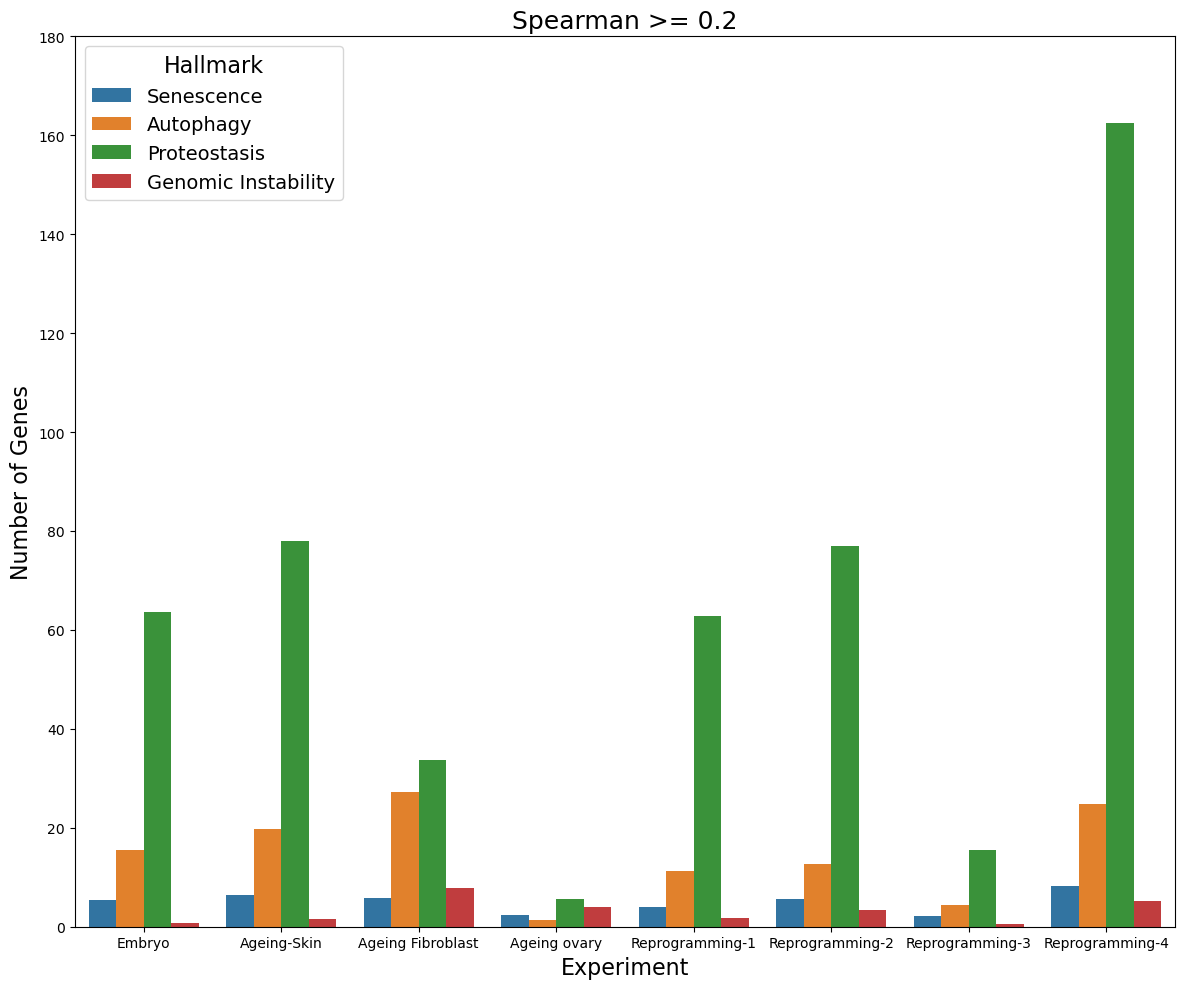

In [258]:
df_melted = summary_all.melt(id_vars=['Hallmark', 'Experiment'], 
                    value_vars=['n_genes>0.2'],
                    var_name='Gene_Type', 
                    value_name='n_genes')

# Plotting the barplot
plt.figure(figsize=(12, 10))
sns.barplot(data=df_melted, x='Experiment', y='n_genes', hue='Hallmark', dodge=True, errorbar=None)

# Enhancing plot appearance
plt.title('Spearman >= 0.2', fontsize=18)
plt.xlabel('Experiment', fontsize=16)
plt.ylabel('Number of Genes', fontsize=16)
plt.legend(title='Hallmark', fontsize=14, title_fontsize=16, loc='upper left')
plt.ylim(0, 180)
plt.tight_layout()
# plt.show()

plt.savefig('spearman0_2.png', dpi = 500)

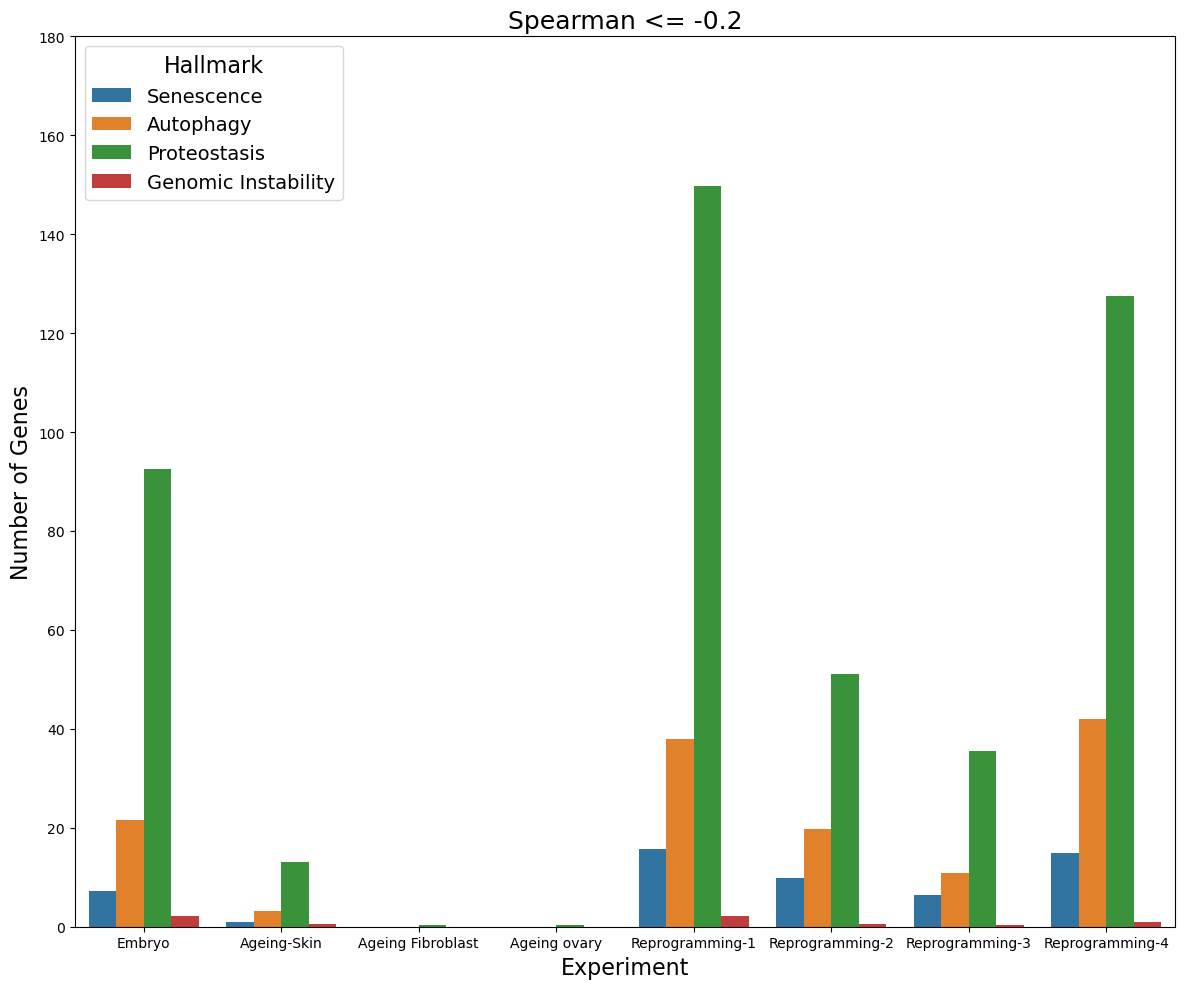

In [259]:
df_melted = summary_all.melt(id_vars=['Hallmark', 'Experiment'], 
                    value_vars=['n_genes<-0.2'],
                    var_name='Gene_Type', 
                    value_name='n_genes')

# Plotting the barplot
plt.figure(figsize=(12, 10))
sns.barplot(data=df_melted, x='Experiment', y='n_genes', hue='Hallmark', dodge=True, errorbar=None)

# Enhancing plot appearance
plt.title('Spearman <= -0.2', fontsize=18)
plt.xlabel('Experiment', fontsize=16)
plt.ylabel('Number of Genes', fontsize=16)
plt.legend(title='Hallmark', fontsize=14, title_fontsize=16, loc='upper left')
plt.ylim(0, 180)
plt.tight_layout()
# plt.show()

plt.savefig('spearman-0_2.png', dpi = 500)

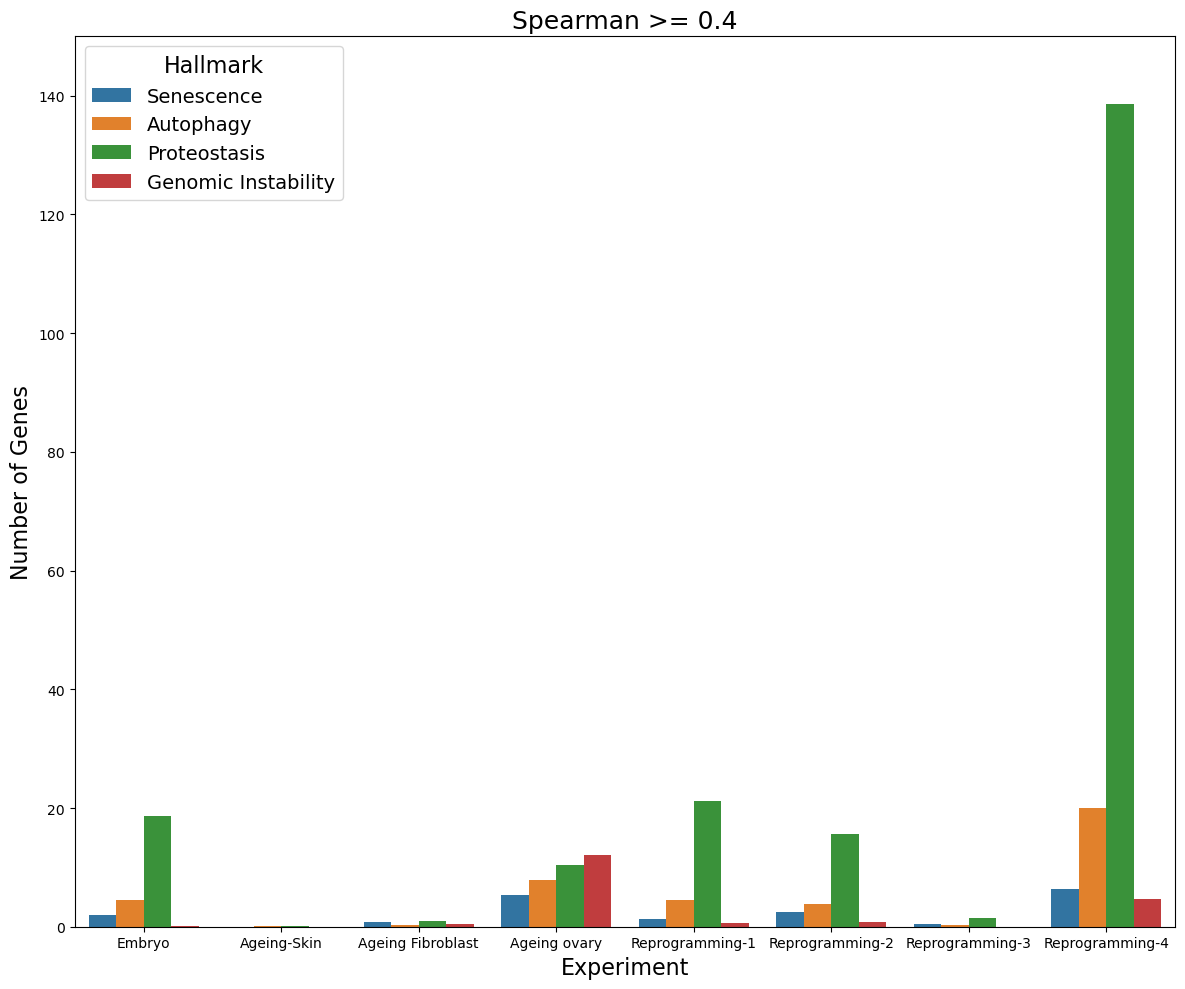

In [260]:
df_melted = summary_all.melt(id_vars=['Hallmark', 'Experiment'], 
                    value_vars=['n_genes>0.4'],
                    var_name='Gene_Type', 
                    value_name='n_genes')

# Plotting the barplot
plt.figure(figsize=(12, 10))
sns.barplot(data=df_melted, x='Experiment', y='n_genes', hue='Hallmark', dodge=True, errorbar=None)

# Enhancing plot appearance
plt.title('Spearman >= 0.4', fontsize=18)
plt.xlabel('Experiment', fontsize=16)
plt.ylabel('Number of Genes', fontsize=16)
plt.legend(title='Hallmark', fontsize=14, title_fontsize=16, loc='upper left')
plt.ylim(0, 150)
plt.tight_layout()
# plt.show()

plt.savefig('spearman0_4.png', dpi = 500)

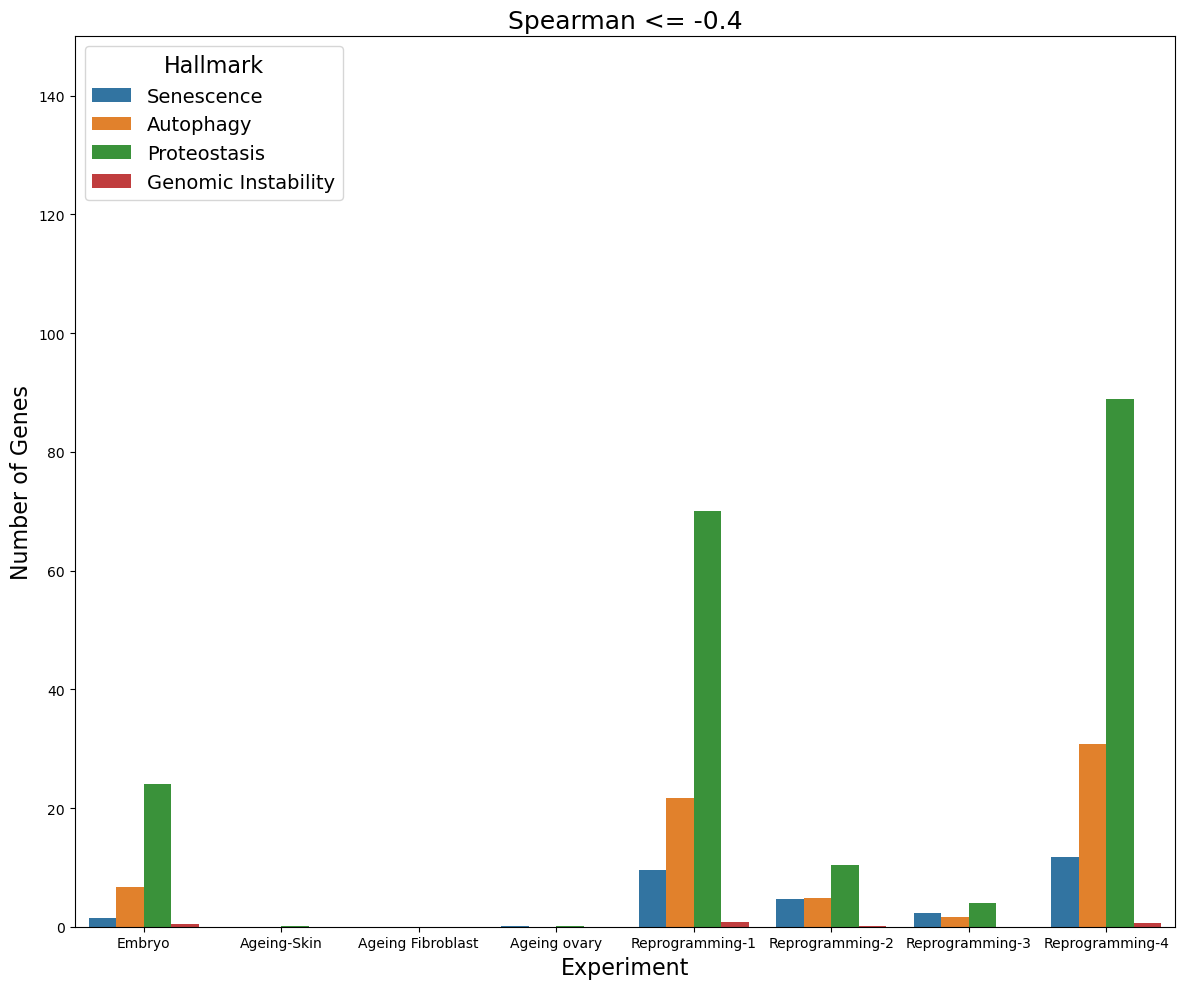

In [261]:
df_melted = summary_all.melt(id_vars=['Hallmark', 'Experiment'], 
                    value_vars=['n_genes<-0.4'],
                    var_name='Gene_Type', 
                    value_name='n_genes')

# Plotting the barplot
plt.figure(figsize=(12, 10))
sns.barplot(data=df_melted, x='Experiment', y='n_genes', hue='Hallmark', dodge=True, errorbar=None)

# Enhancing plot appearance
plt.title('Spearman <= -0.4', fontsize=18)
plt.xlabel('Experiment', fontsize=16)
plt.ylabel('Number of Genes', fontsize=16)
plt.legend(title='Hallmark', fontsize=14, title_fontsize=16, loc='upper left')
plt.ylim(0, 150)
plt.tight_layout()
# plt.show()

plt.savefig('spearman-0_4.png', dpi = 500)